USE FOR REFERENCE.
https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/

Here we will Use (unautorized) library sklearn to see what kind of performance we should expect with a good implementation of logistic reg (using Ridge VS Lasso).

And then we can implement the best one (Ridge or Lasso)

In [1]:
import numpy as np
import pandas as pd
import math 
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


-Each Image is 1568 feature-long. 
-Each image contains 2 digits.
    - Representing a 56x28 pixel image 

-Each digit is a total of 784 pixel (i.e. 1568/2)
    - Representing a 28x28 pixel image 

    

In [2]:
train_inputs = np.genfromtxt('data/train.csv',  delimiter=',')
train_inputs = train_inputs[1:,:-1]

label_inputs = np.genfromtxt('data/train_result.csv',  delimiter=',')
label_inputs = label_inputs[1:,-1]

test_inputs = np.genfromtxt('data/test.csv',  delimiter=',')
test_inputs = test_inputs[1:,:-1]

In [3]:
# https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_inputs, 
                                                    label_inputs,
                                                   test_size=0.25,
                                                   random_state=0)
                                                   

In [4]:
X_train.shape, X_test.shape

((37500, 1568), (12500, 1568))

FIRST I WILL TRY WITH RIDGE REGRESSION.

THEN WITH LASSO. AND I WILL IMPLEMENT THE BETTER ONE.



In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=3000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=8, # parallelize over 5 processes
                        tol=0.01 # was 0.01
                         )
clf


clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression 
                        solver='saga',
                        max_iter=3000, # was 10000
                        verbose=2, # output progress
                        n_jobs=8, # parallelize over 5 processes
                        C=50)
clf2

LogisticRegression(C=50, max_iter=3000, n_jobs=8, solver='saga', verbose=2)

WARNING !!!! :
 
With parameters defined at (below), the clf.fit() took X mins

clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression 
                        solver='saga',
                        max_iter=5000, # was 10000
                        verbose=2, # output progress
                        n_jobs=6, # parallelize over 5 processes
                        C=50)

for 10 iterations --> 2 mins

In [8]:
%%time
# clf.fit(X_train, y_train)
clf.fit(train_inputs, label_inputs)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 55 epochs took 1076 seconds
CPU times: total: 17min 38s
Wall time: 17min 56s


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed: 17.9min finished


LogisticRegression(C=50, max_iter=3000, n_jobs=8, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [9]:
%%time
# clf2.fit(X_train, y_train)
clf2.fit(train_inputs, label_inputs)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


In [39]:
print(clf.classes_)
print(clf.coef_.shape)
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]
(19, 1568)


array([0., 0., 0., ..., 0., 0., 0.])

Overview of label data. 
Labels go from 0 to 18 and we observe a bell-shaped (gaussian-like) distribution.

In [41]:
print(clf.intercept_) # for 10 classes - this is a One-vs-All classification
clf.n_iter_[0] # num of iterations before tolerance was reached

[-2.41073431  0.45744084  1.30331502  1.48366436  2.26872857  2.79123025
  2.80865622  2.79955648  1.84563209  1.30552179  0.84561132 -0.00635468
 -0.37962095 -0.23302931 -1.2594877  -2.22481986 -3.03833332 -4.85239282
 -3.50458399]


52

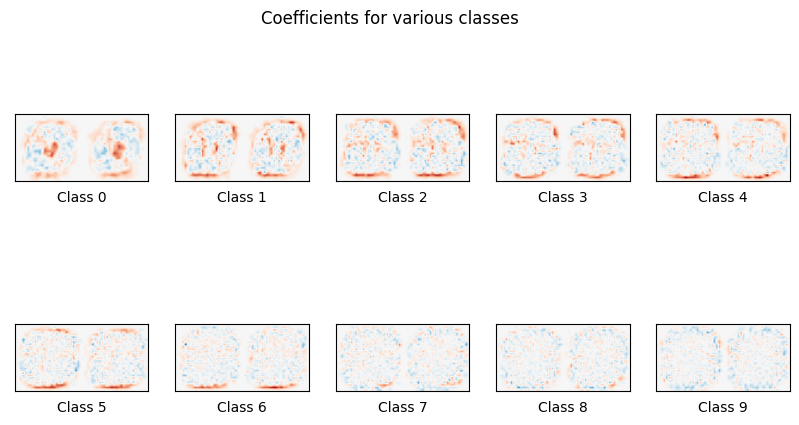

In [42]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,56), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [43]:
# try predictions and compare 
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[15.  3.  5. 14. 10. 12.  9.  3.  9.]
[12.  3.  6. 14.  7. 15.  7.  4. 12.]


In [45]:
# try predictions and compare 
print(clf2.predict(X_test[0:9]))
print(y_test[0:9])

[15.  3.  5. 14. 10. 12.  9.  3.  9.]
[12.  3.  6. 14.  7. 15.  7.  4. 12.]


In [44]:
print(clf.score(X_train, y_train)) # training score
print(clf.score(X_test, y_test)) # test score

0.35568
0.20904


In [46]:
print(clf2.score(X_train, y_train)) # training score
print(clf2.score(X_test, y_test)) # test score

0.37317333333333336
0.20976


(12500,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


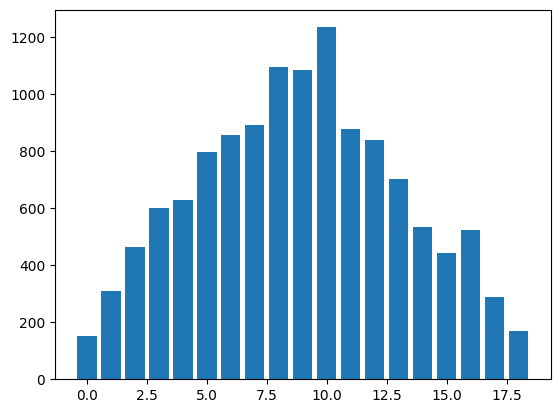

In [34]:
# Distribution of predictions 
from collections import Counter
pred = clf.predict(X_test)
print(pred.shape)
print(np.unique(pred))
c = Counter(pred)
plt.bar(c.keys(), c.values())
plt.show()

In [35]:
from sklearn import metrics
predictions = clf.predict(X_train)

cm = metrics.confusion_matrix(y_true=y_train, 
                         y_pred = predictions, 
                        labels = clf.classes_)

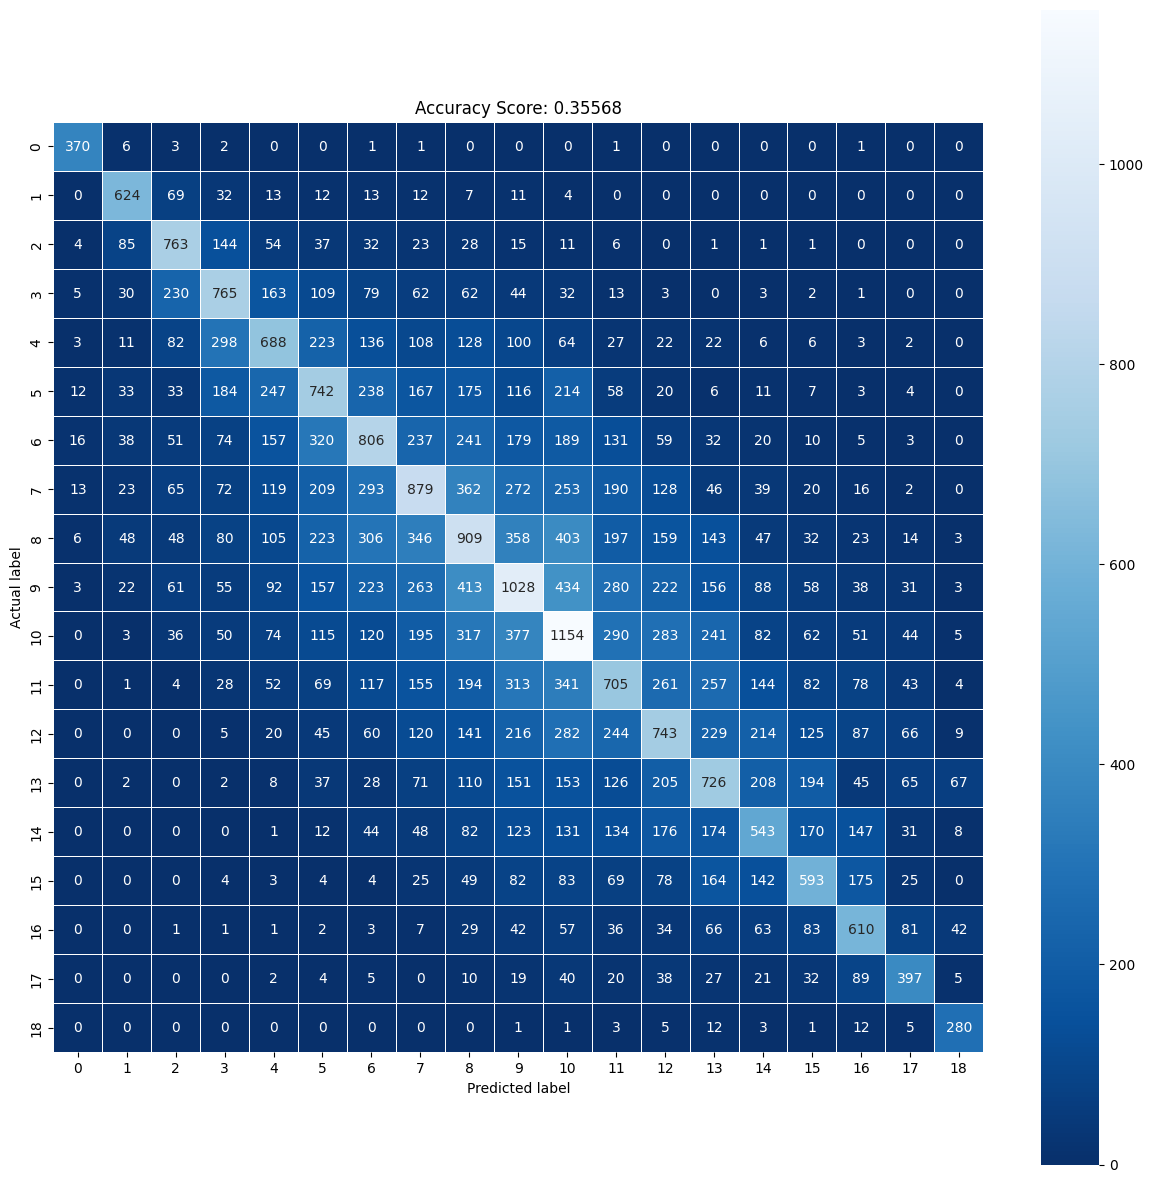

In [47]:
import seaborn as sns
score = clf.score(X_train, y_train) # test score
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);



In [29]:
np.random.rand(3,3)

array([[0.90813045, 0.42755629, 0.98341215],
       [0.89079484, 0.39934098, 0.56569419],
       [0.99906456, 0.57515802, 0.12419742]])